In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option("display.max_columns", 200)
import re
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [2]:
data = pd.read_csv("Car details v3.csv", na_values=[''])

In [3]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
data = data.astype("str")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           8128 non-null   object
 1   year           8128 non-null   object
 2   selling_price  8128 non-null   object
 3   km_driven      8128 non-null   object
 4   fuel           8128 non-null   object
 5   seller_type    8128 non-null   object
 6   transmission   8128 non-null   object
 7   owner          8128 non-null   object
 8   mileage        8128 non-null   object
 9   engine         8128 non-null   object
 10  max_power      8128 non-null   object
 11  torque         8128 non-null   object
 12  seats          8128 non-null   object
dtypes: object(13)
memory usage: 825.6+ KB


In [6]:
data['mileage Km/L'] = data['mileage'].str.extract(pat = "([0-9]*\\.[0-9]+)")
data['engine CC'] = data['engine'].str.extract(pat = "([0-9]+)")
data['max_power hp'] = data['max_power'].str.extract(pat = '([0-9]+.[0-9]{,2})')

In [7]:
data = data.drop(['mileage','engine','max_power'], axis=1)

In [8]:
data.isna()['seats'].value_counts()

seats
False    8128
Name: count, dtype: int64

In [9]:
data.shape

(8128, 13)

There is no company name for the cars, so lets add that column (First Word)

In [10]:
data['company'] = data['name'].str.split(n=0).map(lambda x: x[0])

In [11]:
data = data.astype("Int64", errors='ignore')

In [12]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,mileage Km/L,engine CC,max_power hp,company
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,190Nm@ 2000rpm,5.0,23.4,1248,74,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,250Nm@ 1500-2500rpm,5.0,21.14,1498,103.52,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,"12.7@ 2,700(kgm@ rpm)",5.0,17.7,1497,78,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,22.4 kgm at 1750-2750rpm,5.0,23.0,1396,90,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,"11.5@ 4,500(kgm@ rpm)",5.0,16.1,1298,88.2,Maruti


In [13]:
transmission_by_year = data.groupby(['year', 'transmission'])['name'].count()
transmission_by_year = transmission_by_year.unstack(level='transmission').fillna(0)
transmission_by_year.head()

transmission,Automatic,Manual
year,,
1983,0.0,1.0
1991,0.0,1.0
1994,0.0,3.0
1995,0.0,2.0
1996,0.0,3.0


In [14]:
transmission_by_year['sum'] = transmission_by_year.sum(axis=1)
transmission_by_year.head()

transmission,Automatic,Manual,sum
year,,,
1983,0.0,1.0,1.0
1991,0.0,1.0,1.0
1994,0.0,3.0,3.0
1995,0.0,2.0,2.0
1996,0.0,3.0,3.0


In [15]:
transmission_by_year_pct = transmission_by_year[['Automatic', 'Manual']].div(transmission_by_year[['Automatic', 'Manual']].sum(axis=1), axis=0) *100

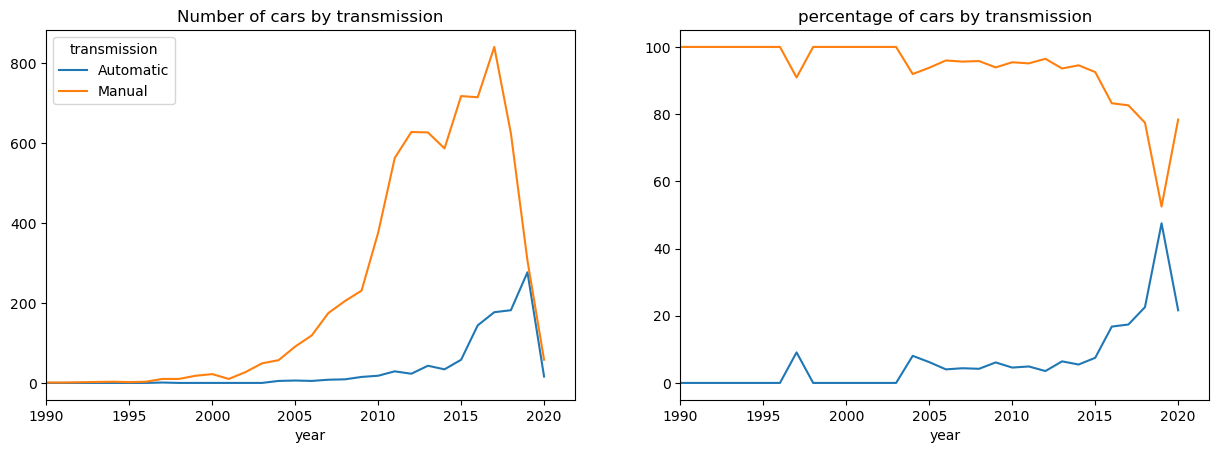

In [16]:
fig, axes = plt.subplots(1,2, sharex=True)
fig.set_figwidth(15)
transmission_by_year[['Automatic','Manual']].plot(ax=axes[0],legend=True)
axes[0].set(title="Number of cars by transmission", xlim=1990)
transmission_by_year_pct.plot(ax=axes[1], legend=False)
axes[1].set(title="percentage of cars by transmission", xlim=1990);
# fig.legend()

In [17]:
data['fuel'] = data['fuel'].astype('category')

Lets see if there is a correlation somewhere first lets clean it up

In [18]:
data[['mileage Km/L', 'engine CC', 'max_power hp', 'seats']] = data[['mileage Km/L',
                                                                     'engine CC', 'max_power hp', 'seats']].astype('float')

In [19]:
data[['seller_type', 'transmission', 'owner']] = data[['seller_type', 'transmission', 'owner']].astype("category")

In [20]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,mileage Km/L,engine CC,max_power hp,company
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,190Nm@ 2000rpm,5.0,23.40,1248.0,74.00,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,250Nm@ 1500-2500rpm,5.0,21.14,1498.0,103.52,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,"12.7@ 2,700(kgm@ rpm)",5.0,17.70,1497.0,78.00,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,22.4 kgm at 1750-2750rpm,5.0,23.00,1396.0,90.00,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,"11.5@ 4,500(kgm@ rpm)",5.0,16.10,1298.0,88.20,Maruti


In [21]:
data['engine CC'] = data['engine CC'].map(lambda x: round(x,-2))

In [22]:
cc_count = data['engine CC'].value_counts()

<Axes: xlabel='engine CC'>

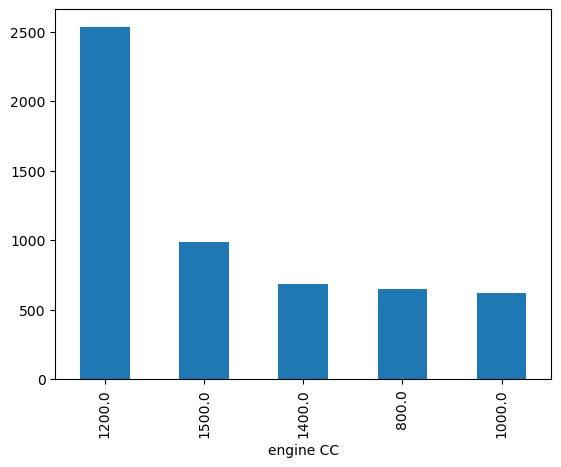

In [23]:
cc_count.nlargest(5).plot.bar()

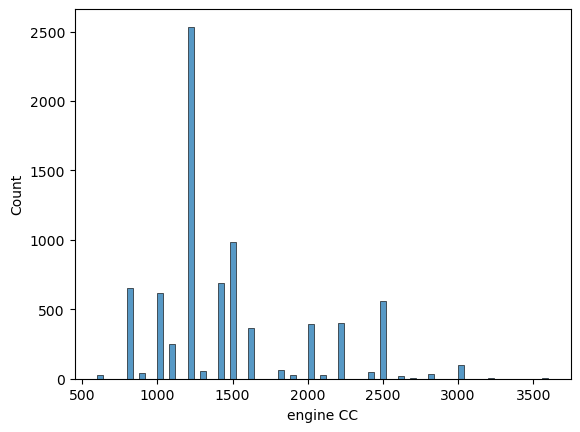

In [24]:
pd.option_context('mode.use_inf_as_na', True)
sns.histplot(data=data, x='engine CC');

Lets check for a particular cc cars, the correlation of max horsepower and engine cc

<Axes: >

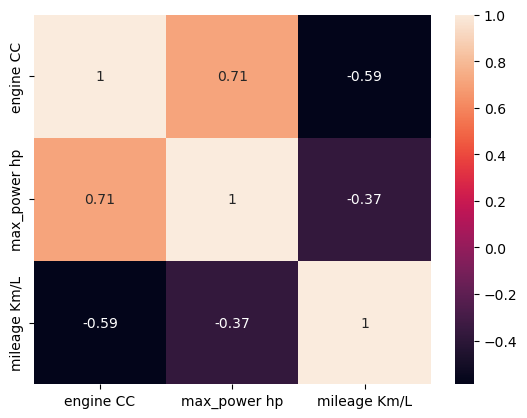

In [46]:
sns.heatmap(data[['engine CC','max_power hp','mileage Km/L']].corr(), annot=True)

In [26]:
data[data['max_power hp'] > 350]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,mileage Km/L,engine CC,max_power hp,company
170,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,640Nm@ 1740rpm,4.0,42.0,2000.0,400.0,Volvo


We can see there is a strong correlation between horse power and engine capacity. So lets plot it

Text(2030, 400, 'Volvo XC90 T8 Excellence BSIV')

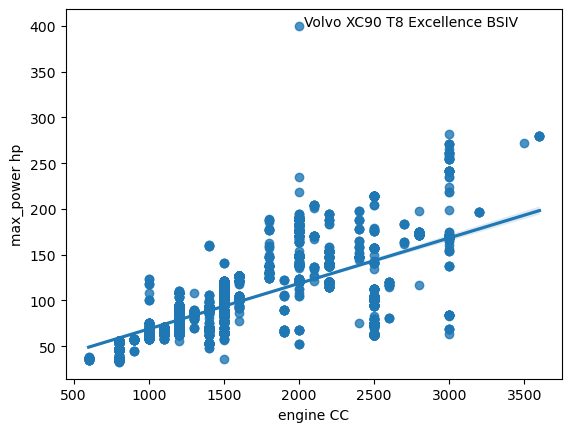

In [27]:
ax = sns.regplot(data=data, x='engine CC', y='max_power hp')
ax.text(2030, 400, "Volvo XC90 T8 Excellence BSIV")

Volvo XC90 T8 Excellence BSIV had 400 hp at 2000 cc and was an outlier

In [28]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,mileage Km/L,engine CC,max_power hp,company
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,190Nm@ 2000rpm,5.0,23.40,1200.0,74.00,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,250Nm@ 1500-2500rpm,5.0,21.14,1500.0,103.52,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,"12.7@ 2,700(kgm@ rpm)",5.0,17.70,1500.0,78.00,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,22.4 kgm at 1750-2750rpm,5.0,23.00,1400.0,90.00,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,"11.5@ 4,500(kgm@ rpm)",5.0,16.10,1300.0,88.20,Maruti


In [29]:
data['torque'] = data['torque'].str.replace(pat="at", repl="@")

In [30]:
def get_nm(x):
        if x[0] == np.nan or x[0] == 'nan':
            return x[0]
        # check = re.findall()
        if  re.search('Nm?' , x[0], flags=re.IGNORECASE):
            nm = float(re.search(pattern= r'-?\d*\.?\d+', string=x[0]).group())
        else:
            kgm = float(re.search(pattern= r'-?\d*\.?\d+', string=x[0]).group())
            nm = kgm * 9.80665
        return float("{:.2f}".format(nm))
# get_nm(['250'])
splitted = data['torque'].str.split('@')
data['torque Nm'] = splitted.map(get_nm).astype("float")

In [31]:
data = data.drop(axis=1, labels=['torque'])

I have now cleaned all the columns. I will now store the cleaned data in a another csv file :)

In [32]:
data.to_csv('cleaned_cars.csv', index=False)

In [33]:
cleaned = pd.read_csv('cleaned_cars.csv')
cleaned.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage Km/L,engine CC,max_power hp,company,torque Nm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,1200.0,74.00,Maruti,190.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,1500.0,103.52,Skoda,250.00
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,1500.0,78.00,Honda,124.54
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,1400.0,90.00,Hyundai,219.67
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,1300.0,88.20,Maruti,112.78


Now we can work with torque as well. As all of our values have now been cleaned, lets plot each other as pairs

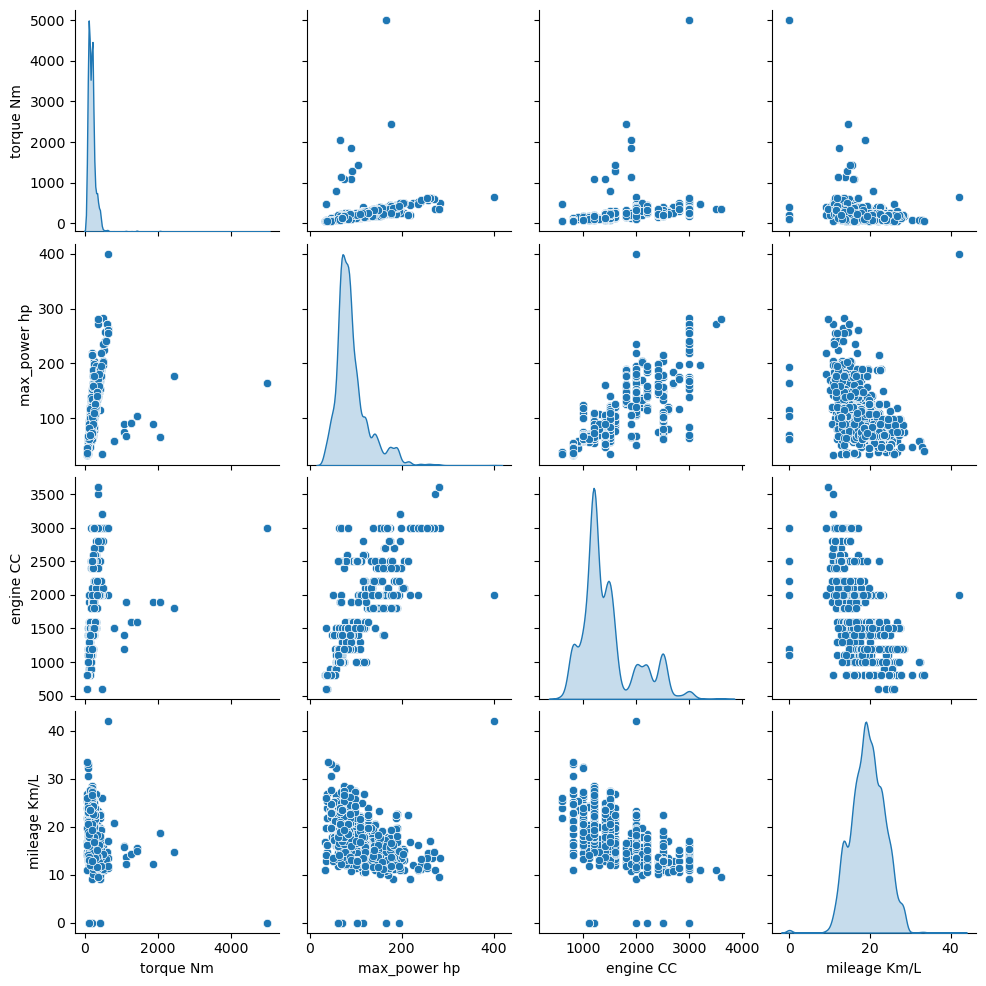

In [34]:

sns.pairplot(cleaned[['torque Nm', 'max_power hp', 'engine CC', 'mileage Km/L']], diag_kind='kde')

Lets see what is the best factor of the selling price

0.7496738294728562


[Text(0, 0, '0'),
 Text(0, 100, '2'),
 Text(0, 4, '4'),
 Text(0, 6, '6'),
 Text(0, 8, '8'),
 Text(0, 10, '10')]

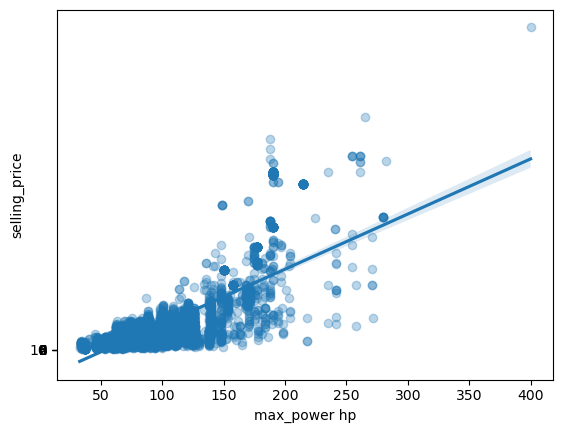

In [45]:
print(cleaned['selling_price'].corr(cleaned['max_power hp']))
ax = sns.regplot(data=cleaned, x='max_power hp', y='selling_price',  scatter_kws={'alpha':0.3,})
ax.set_yticks([0,100,4,6,8,10])
ax.set_yticklabels([0,2,4,6,8,10])

In [48]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage Km/L,engine CC,max_power hp,company,torque Nm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.40,1200.0,74.00,Maruti,190.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,1500.0,103.52,Skoda,250.00
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.70,1500.0,78.00,Honda,124.54
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.00,1400.0,90.00,Hyundai,219.67
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.10,1300.0,88.20,Maruti,112.78


Lets see which company has the highest average km driven per owner type

<Axes: ylabel='Density'>

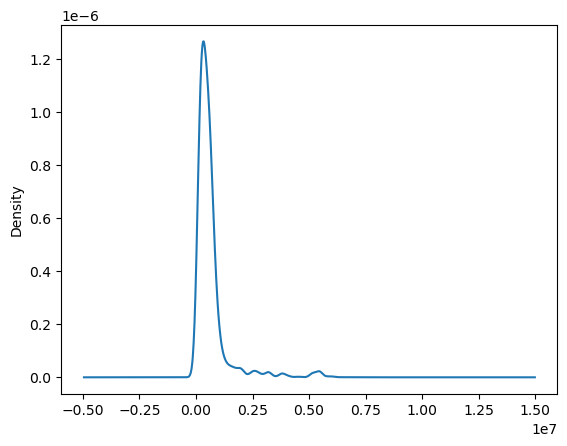

In [56]:
data['selling_price'].plot.density()

Second Owner    83333.333333
Third Owner          80000.0
Average         81666.666667
dtype: Float64

In [168]:
reliability = data.groupby(['company', 'owner'], observed=True)['km_driven'].aggregate(['mean', "count"])
reliability.head()


mean  count
company    owner                                    
Ambassador Second Owner          83333.333333      3
           Third Owner                80000.0      1
Ashok      Second Owner              200000.0      1
Audi       First Owner           53109.357143     28
           Fourth & Above Owner       98000.0      1

In [169]:
company_count = reliability.groupby(level=0)['count'].sum()

In [171]:
reliability.drop('count', axis=1)

mean
company    owner                             
Ambassador Second Owner          83333.333333
           Third Owner                80000.0
Ashok      Second Owner              200000.0
Audi       First Owner           53109.357143
           Fourth & Above Owner       98000.0
...                                       ...
Volkswagen Second Owner          87953.105263
           Test Drive Car              5400.0
           Third Owner           91714.285714
Volvo      First Owner           13287.878788
           Second Owner               72500.0

[89 rows x 1 columns]

In [167]:
reliability = reliability.drop('count', axis=1)
# reliability = reliability.unstack(level=1)[['First Owner', 'Second Owner', 'Third Owner']]

KeyError: "['count'] not found in axis"

In [144]:
reliability['Average'] = reliability.apply('mean', axis=1)

In [147]:
reliability.sort_values(by='Average', ascending=False)

owner,First Owner,Second Owner,Third Owner,Average
company,,,,
Ashok,<NA>,200000.0,<NA>,200000.0
Mitsubishi,105081.833333,186000.0,110000.0,133693.944444
Toyota,84384.209622,119174.138365,161388.888889,121649.078959
Opel,<NA>,<NA>,110000.0,110000.0
Peugeot,<NA>,<NA>,110000.0,110000.0
Mahindra,81328.627291,96395.845794,134205.865385,103976.77949
Tata,69660.870213,98575.050251,111066.039216,93100.653227
Fiat,74335.92,92309.058824,110000.0,92214.992941
Skoda,51234.970588,104447.62069,117500.0,91060.863759
